# Práctica 8b: clasificación con random forest

La creación de un árbol de decisión consiste en descomponer un conjunto de datos en subconjuntos cada vez más pequeños mientras se ramifican (creando un árbol de decisión asociado). Random Forest es una colección o conjunto de muchos árboles de decisión, de los cuáles se elige el que mejor desempeño resulte.

In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
#IMPORTAMOS DATASET
file = "covid_mx.csv"
df = pd.read_csv(file,encoding ='latin', error_bad_lines=False)
df.head()

,N° Caso,Estado,Sexo,Edad,Fecha de Inicio de síntomas,Identificación de COVID-19 por RT-PCR\nen tiempo real
0,1,TAMAULIPAS,MASCULINO,22,04/04/2020,Confirmado
1,2,CIUDAD DE MÉXICO,MASCULINO,40,17/03/2020,Confirmado
2,3,CIUDAD DE MÉXICO,FEMENINO,29,26/03/2020,Confirmado
3,4,MÉXICO,FEMENINO,84,26/03/2020,Confirmado
4,5,NUEVO LEÓN,MASCULINO,54,20/03/2020,Confirmado


In [3]:
df.rename(columns={'Identificación de COVID-19 por RT-PCR\nen tiempo real':
                   'diagnostico',
                        },
               inplace=True)
df.columns

Index(['N° Caso', 'Estado', 'Sexo', 'Edad', 'Fecha de Inicio de síntomas',
       'diagnostico'],
      dtype='object')

In [4]:
df.Sexo = df.Sexo.replace({"MASCULINO": 1, "FEMENINO": 2})

In [5]:
df.diagnostico = df.diagnostico.replace({"Confirmado": 1, "Sospechoso": 2})

In [6]:
df["Sexo"].unique()

array([1, 2], dtype=int64)

In [7]:
df["diagnostico"].unique()

array([1, 2], dtype=int64)

In [8]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 5].values

In [9]:
#Dividimos nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
#Escalamos características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [17]:
# Visualizando los resultados del conjunto de prueba
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
# Predecimo los valores del testeo
y_pred = classifier.predict(X_test)

In [19]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7467658473479948


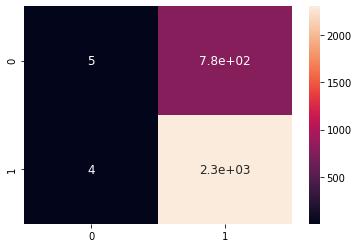

In [20]:
# Hacemos la matriz de confusion
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


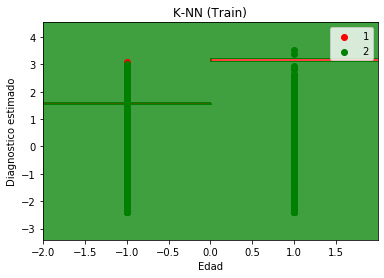

In [21]:
# Visualizamos los resultados del entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) 
    
plt.title('K-NN (Train)')
plt.xlabel('Edad')
plt.ylabel('Diagnostico estimado')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


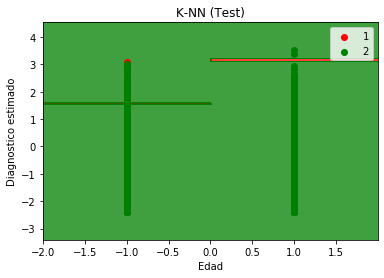

In [22]:
# Visualizamos el resultado del testeo
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Test)')
plt.xlabel('Edad')
plt.ylabel('Diagnostico estimado')
plt.legend()
plt.show()